In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
bike_db = pd.read_csv('/Users/umar/Desktop/ML project/bike_data.csv')

In [35]:
bike_db.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
bike_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [37]:
# Detecting outliers 
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                     # Interquartile range
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Outliers will be values below {lower_bound} or above {upper_bound}.")
    
    # Identifying outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Number of outliers in '{column}': {len(outliers)}")
    
    return lower_bound, upper_bound, outliers


In [38]:
# Detecting outliers in 'TEMP'
lower, upper, outliers = detect_outliers_iqr(bike_db, 'temp')

# Print the outliers to check which values are outliers

print("\nOutliers in 'temp' column:")
print(outliers)

Outliers will be values below -0.13999999999999996 or above 1.1400000000000001.
Number of outliers in 'temp': 0

Outliers in 'temp' column:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


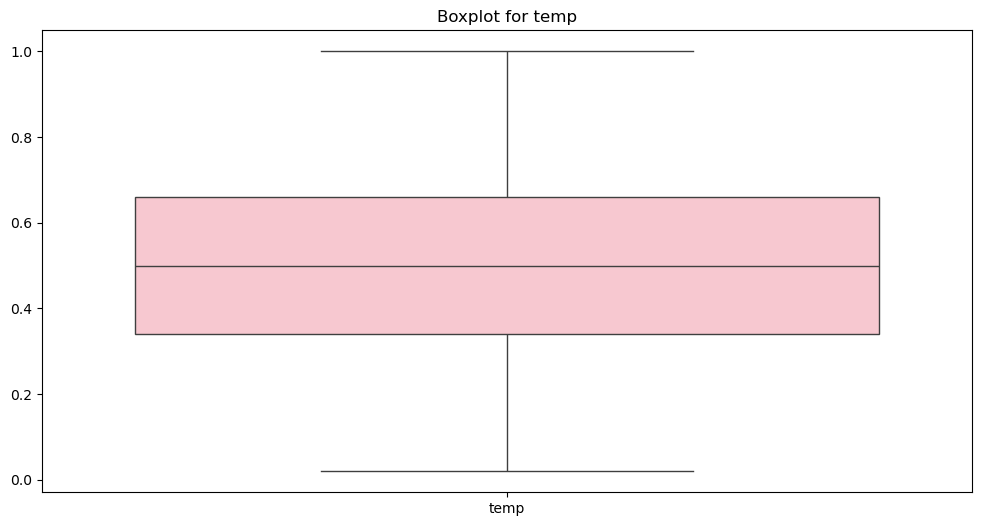

In [39]:
# Boxplot to detect outliers in 'temp'
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_db[['temp']],color='Pink')
plt.title("Boxplot for temp")
plt.show()

In [40]:
# Detecting outliers in 'atemp'
lower, upper, outliers = detect_outliers_iqr(bike_db, 'atemp')

# Print the outliers to check which values are outliers
print("\nOutliers in 'atemp' column:")
print(outliers)

Outliers will be values below -0.09854999999999997 or above 1.0530499999999998.
Number of outliers in 'atemp': 0

Outliers in 'atemp' column:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


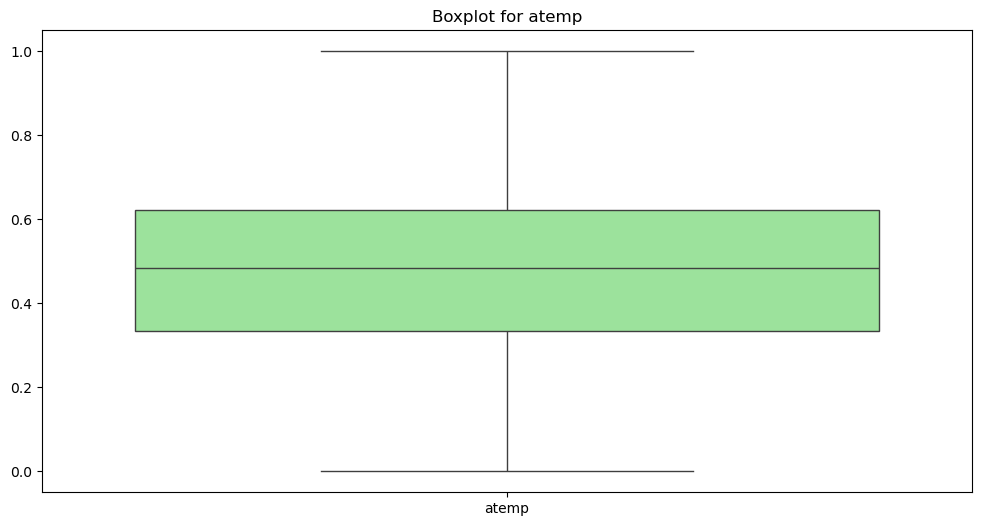

In [41]:
# Boxplot to detect outliers in 'atemp'
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_db[['atemp']], color='lightgreen')
plt.title("Boxplot for atemp")
plt.show()

In [42]:
# Detecting outliers in 'hum'
lower, upper, outliers = detect_outliers_iqr(bike_db, 'hum')

# Print the outliers to check which values are outliers
print("\nOutliers in 'hum' column:")
print(outliers)

Outliers will be values below 0.029999999999999916 or above 1.23.
Number of outliers in 'hum': 22

Outliers in 'hum' column:
      instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
1551     1552  2011-03-10       1   0     3   0        0        4           1   
1552     1553  2011-03-10       1   0     3   1        0        4           1   
1553     1554  2011-03-10       1   0     3   2        0        4           1   
1554     1555  2011-03-10       1   0     3   5        0        4           1   
1555     1556  2011-03-10       1   0     3   6        0        4           1   
1556     1557  2011-03-10       1   0     3   7        0        4           1   
1557     1558  2011-03-10       1   0     3   8        0        4           1   
1558     1559  2011-03-10       1   0     3   9        0        4           1   
1559     1560  2011-03-10       1   0     3  10        0        4           1   
1560     1561  2011-03-10       1   0     3  11        0        4

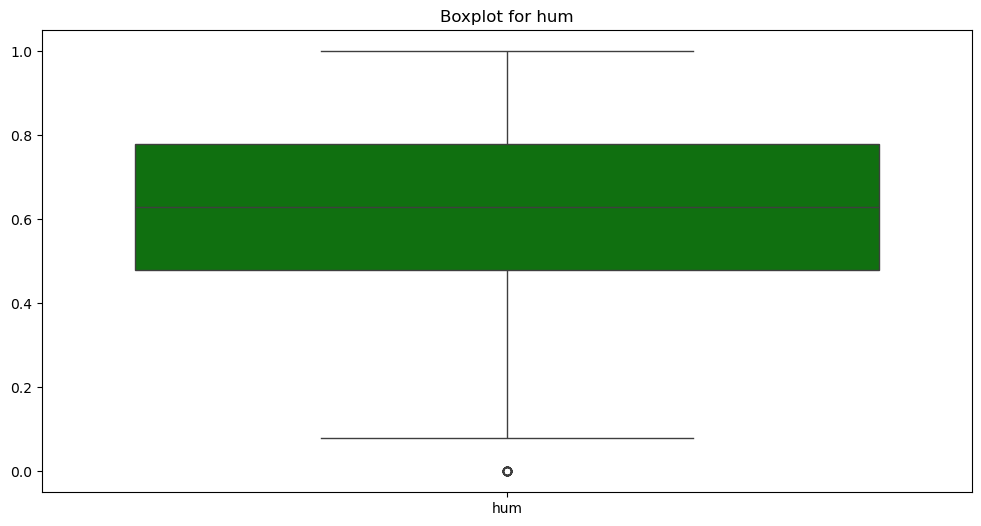

In [43]:
# Boxplot to detect outliers in 'hum'
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_db[['hum']],color='green')
plt.title("Boxplot for hum")
plt.show()

In [44]:
# Handling outliers by capping them

def handle_outliers(data, column, lower_bound, upper_bound):
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])  # Cap lower outliers
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])  # Cap upper outliers
    return data
    
# Handle outliers by capping them to the lower and upper bounds

bike_data = handle_outliers(bike_db, 'hum', lower, upper)

# Summary after handling

print("\nSummary after handling outliers:")
print(bike_data['hum'].describe())


Summary after handling outliers:
count    17379.000000
mean         0.627267
std          0.192809
min          0.030000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64


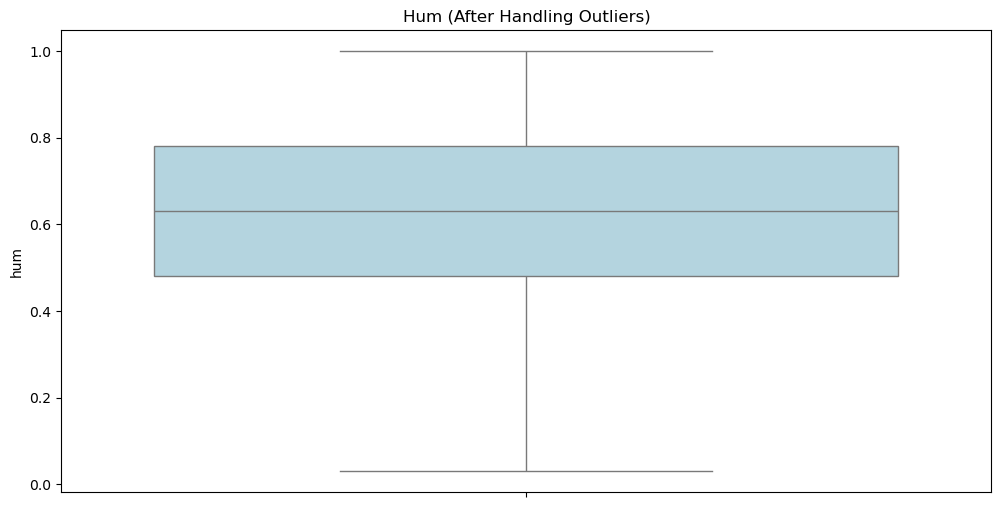

In [45]:
# Boxplot after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(bike_data['hum'], color='lightblue')
plt.title('Hum (After Handling Outliers)')

plt.show()


In [46]:
# Detect outliers in 'wind speed'
lower, upper, outliers = detect_outliers_iqr(bike_db, 'windspeed')

# Print the outliers to check which values are outliers
print("\nOutliers in 'windspeed' column:")
print(outliers)

Outliers will be values below -0.1193 or above 0.4775.
Number of outliers in 'windspeed': 342

Outliers in 'windspeed' column:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
175        176  2011-01-08       1   0     1  14        0        6   
178        179  2011-01-08       1   0     1  17        0        6   
194        195  2011-01-09       1   0     1   9        0        0   
196        197  2011-01-09       1   0     1  11        0        0   
265        266  2011-01-12       1   0     1  12        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17327    17328  2012-12-29       1   1    12  20        0        6   
17328    17329  2012-12-29       1   1    12  21        0        6   
17341    17342  2012-12-30       1   1    12  10        0        0   
17343    17344  2012-12-30       1   1    12  12        0        0   
17344    17345  2012-12-30       1   1    12  13        0        0   

       workingday  weathersit  t

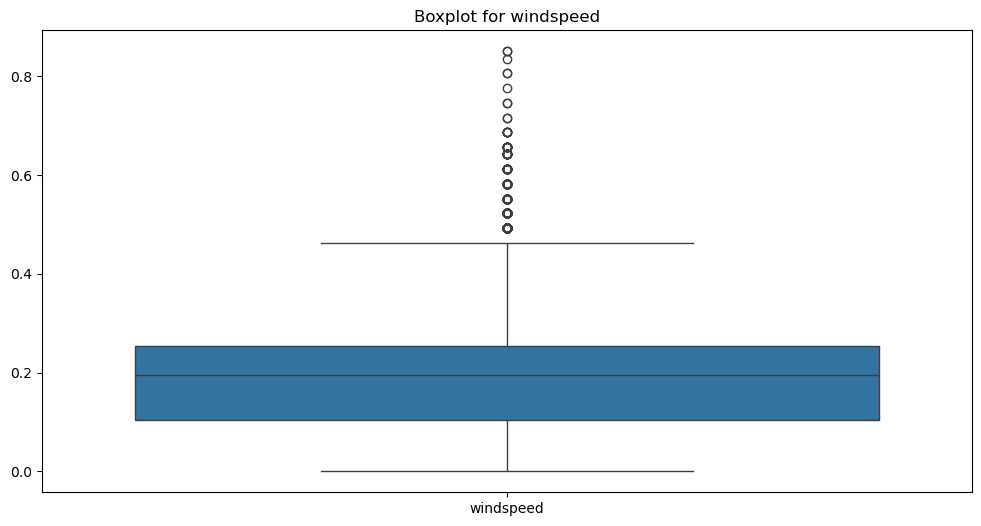

In [47]:
# Boxplot to detect outliers in 'wind speed'
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_db[['windspeed']])
plt.title("Boxplot for windspeed")
plt.show()

In [48]:
# Handle outliers by capping them to the lower and upper bounds
bike_data = handle_outliers(bike_db, 'windspeed', lower, upper)

# Summary after handling
print("\nSummary after handling outliers:")
print(bike_data['windspeed'].describe())


Summary after handling outliers:
count    17379.000000
mean         0.188691
std          0.118197
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.477500
Name: windspeed, dtype: float64


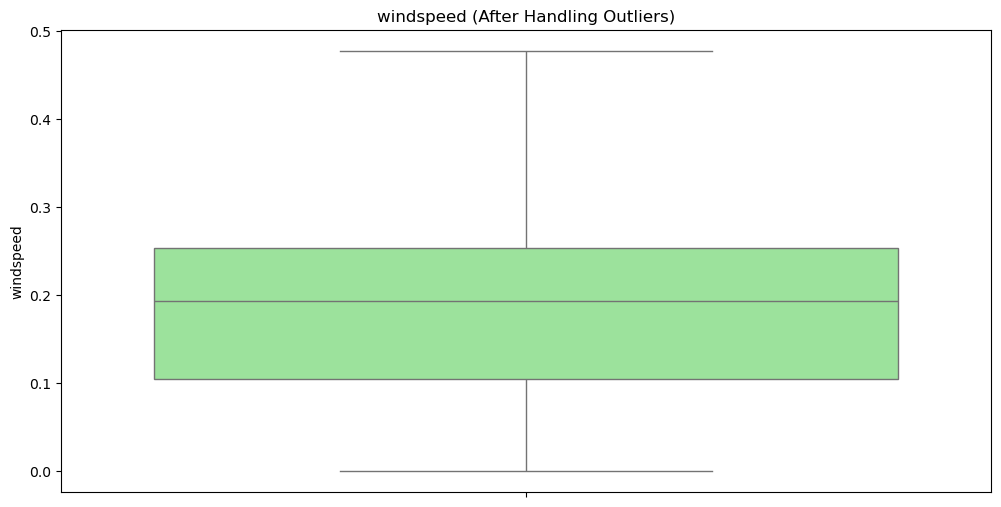

In [49]:
# Boxplot after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(bike_data['windspeed'], color='lightgreen')
plt.title('windspeed (After Handling Outliers)')

plt.show()

In [50]:
# Detect outliers in 'casual'
lower, upper, outliers = detect_outliers_iqr(bike_db, 'casual')

# Print the outliers to check which values are outliers
print("\nOutliers in 'casual' column:")
print(outliers)

Outliers will be values below -62.0 or above 114.0.
Number of outliers in 'casual': 1192

Outliers in 'casual' column:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
1633      1634  2011-03-13       1   0     3  14        0        0   
1634      1635  2011-03-13       1   0     3  15        0        0   
1635      1636  2011-03-13       1   0     3  16        0        0   
1771      1772  2011-03-19       1   0     3  12        0        6   
1772      1773  2011-03-19       1   0     3  13        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16817    16818  2012-12-08       4   1    12  12        0        6   
16818    16819  2012-12-08       4   1    12  13        0        6   
16819    16820  2012-12-08       4   1    12  14        0        6   
16820    16821  2012-12-08       4   1    12  15        0        6   
16821    16822  2012-12-08       4   1    12  16        0        6   

       workingday  weathersit  temp   at

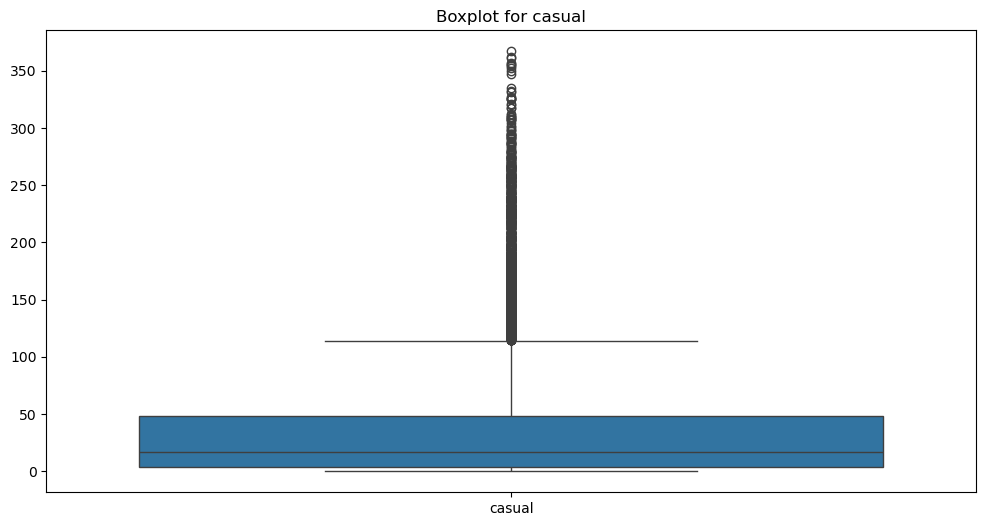

In [51]:
# Boxplot to detect outliers in 'casual'
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_db[['casual']])
plt.title("Boxplot for casual")
plt.show()

In [52]:
# Handle outliers by capping them to the lower and upper bounds
bike_data = handle_outliers(bike_db, 'casual', lower, upper)

# Summary after handling
print("\nSummary after handling outliers:")
print(bike_data['casual'].describe())


Summary after handling outliers:
count    17379.000000
mean        31.158812
std         34.813147
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        114.000000
Name: casual, dtype: float64


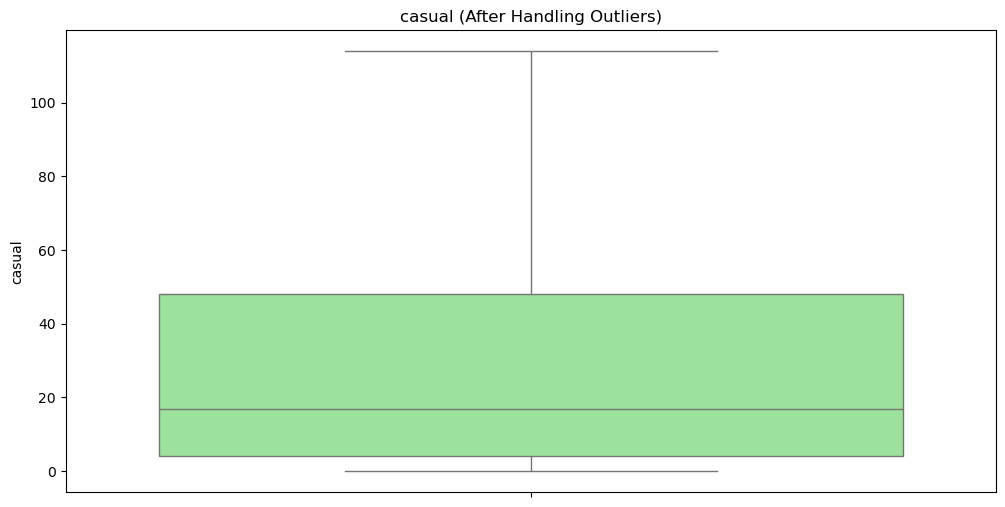

In [53]:
# Boxplot after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(bike_data['casual'], color='lightgreen')
plt.title('casual (After Handling Outliers)')

plt.show()

In [54]:
# Detect outliers in 'registered'
lower, upper, outliers = detect_outliers_iqr(bike_db, 'registered')

# Print the outliers to check which values are outliers
print("\nOutliers in 'registered' column:")
print(outliers)

Outliers will be values below -245.0 or above 499.0.
Number of outliers in 'registered': 680

Outliers in 'registered' column:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
2995      2996  2011-05-09       2   0     5  17        0        1   
3019      3020  2011-05-10       2   0     5  17        0        2   
3067      3068  2011-05-12       2   0     5  17        0        4   
3187      3188  2011-05-17       2   0     5  17        0        2   
3379      3380  2011-05-25       2   0     5  17        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17063    17064  2012-12-18       4   1    12  18        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   
17086    17087  2012-12-19       4   1    12  17        0        3   
17087    17088  2012-12-19       4   1    12  18        0        3   
17101    17102  2012-12-20       4   1    12   8        0        4   

       workingday  weathersit  t

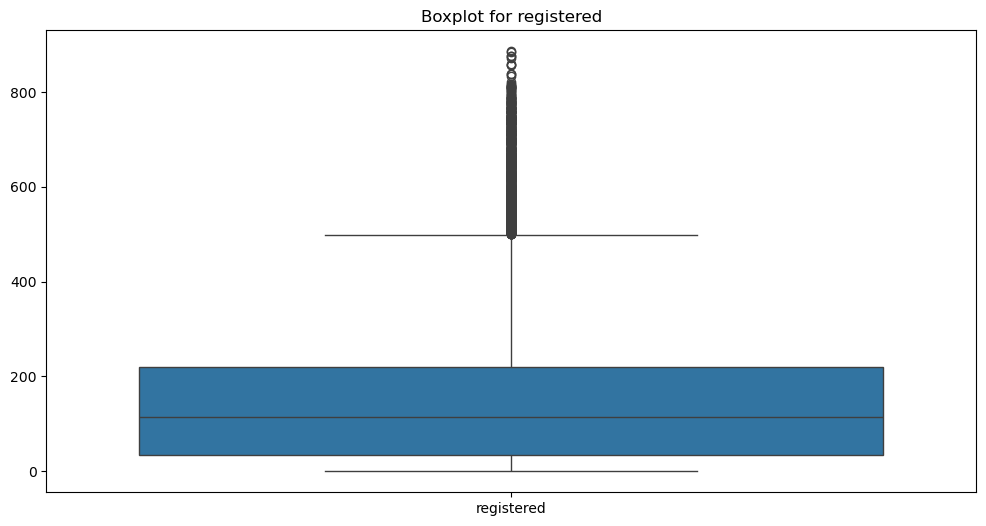

In [55]:
# Boxplot to detect outliers in 'registered'
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_db[['registered']])
plt.title("Boxplot for registered")
plt.show()

In [56]:
# Handle outliers by capping them to the lower and upper bounds
bike_data = handle_outliers(bike_db, 'registered', lower, upper)

# Summary after handling
print("\nSummary after handling outliers:")
print(bike_data['registered'].describe())


Summary after handling outliers:
count    17379.000000
mean       148.645204
std        135.351791
min          0.000000
25%         34.000000
50%        115.000000
75%        220.000000
max        499.000000
Name: registered, dtype: float64


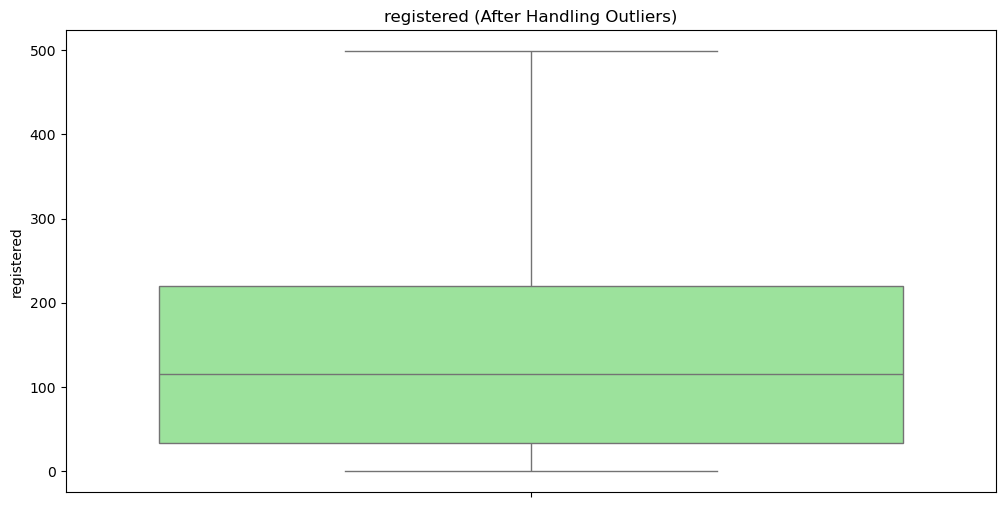

In [57]:
# Boxplot after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(bike_data['registered'], color='lightgreen')
plt.title('registered (After Handling Outliers)')

plt.show()

In [58]:
# Detect outliers in 'cnt'
lower, upper, outliers = detect_outliers_iqr(bike_db, 'cnt')

# Print the outliers to check which values are outliers
print("\nOutliers in 'cnt' column:")
print(outliers)

Outliers will be values below -321.5 or above 642.5.
Number of outliers in 'cnt': 505

Outliers in 'cnt' column:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  2011-08-23       3   0     8  14        0        2   
10358    10359  2012-03-12       1   1     3  17        0        1   
10359    10360  2012-03-12       1   1     3  18        0        1   
10382    10383  2012-03-13       1   1     3  17        0        2   
10383    10384  2012-03-13       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  2012-12-11       4   1    12   8        0        2   
16909    16910  2012-12-12       4   1    12   8        0        3   
16933    16934  2012-12-13       4   1    12   8        0        4   
17053    17054  2012-12-18       4   1    12   8        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   

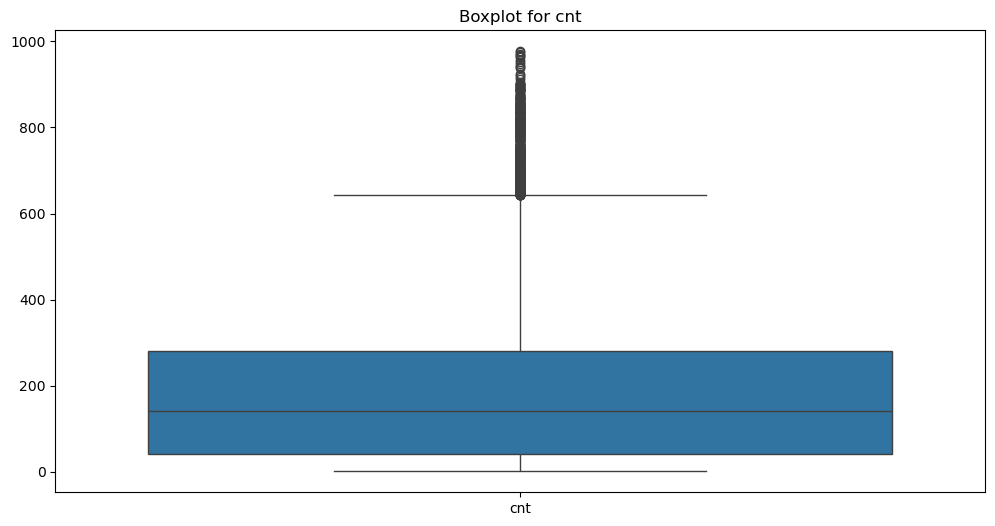

In [59]:
# Boxplot to detect outliers in 'cnt'
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_db[['cnt']])
plt.title("Boxplot for cnt")
plt.show()

In [60]:
# Handle outliers by capping them to the lower and upper bounds
bike_data = handle_outliers(bike_db, 'cnt', lower, upper)

# Summary after handling
print("\nSummary after handling outliers:")
print(bike_data['cnt'].describe())


Summary after handling outliers:
count    17379.000000
mean       186.361327
std        171.931168
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        642.500000
Name: cnt, dtype: float64


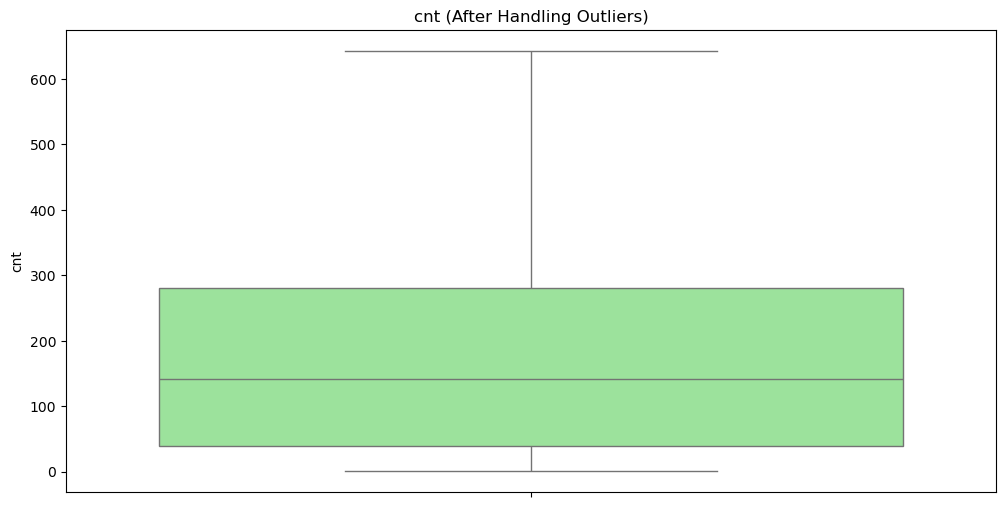

In [61]:
# Boxplot after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(bike_data['cnt'], color='lightgreen')
plt.title('cnt (After Handling Outliers)')

plt.show()

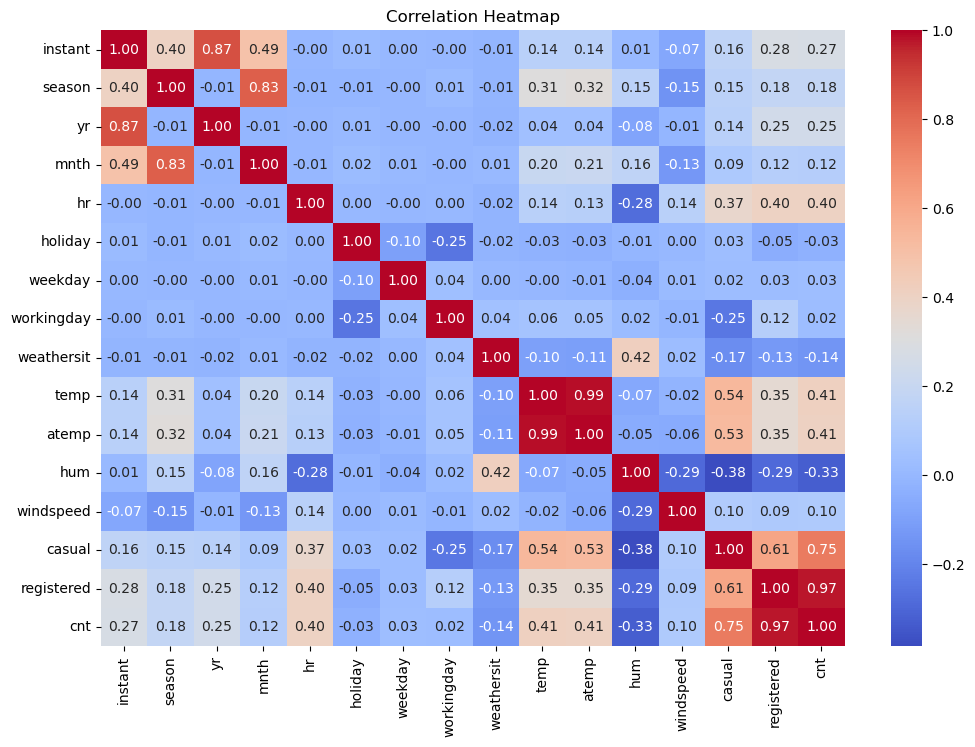

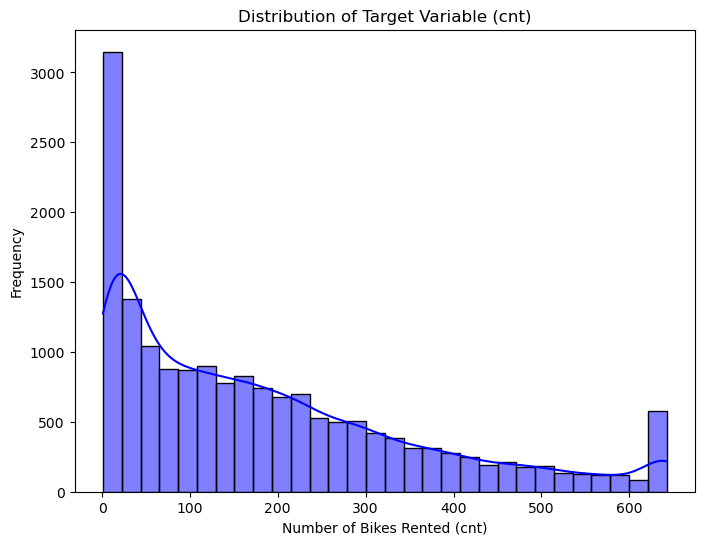

In [62]:
# Calculating the correlation matrix for all the numerical columns

correlation_matrix = bike_db.corr(numeric_only=True)

# Create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Distribution of the target variable `cnt`
plt.figure(figsize=(8, 6))
sns.histplot(bike_db['cnt'], kde=True, bins=30, color='blue')
plt.title("Distribution of Target Variable (cnt)")
plt.xlabel("Number of Bikes Rented (cnt)")
plt.ylabel("Frequency")
plt.show()

In [63]:
# Select relevant weather features and the target variable
features = ['temp', 'atemp', 'hum', 'windspeed']
X = bike_db[features].values  # Predictor variables
y = bike_db['cnt'].values     # Target variable

# Add a column of ones to X for the intercept term
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Adding the intercept (bias) term

# Calculate weights using the closed-form solution: w = (X^T X)^-1 X^T y
weights = np.linalg.inv(X.T @ X) @ X.T @ y

# Make predictions
y_pred = X @ weights

# Calculate evaluation metrics: Mean Squared Error (MSE) and R^2
mse = np.mean((y - y_pred) ** 2)
r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))
mae = np.mean(np.abs(y - y_pred))

# Print results
print("Linear Regression Coefficients:", weights)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Linear Regression Coefficients: [ 157.6490046    63.2822843   324.25190266 -265.6439203    50.9854192 ]
Mean Squared Error (MSE): 21783.620931378064
Mean Absolute Error (MAE): 113.32022781089171
R-squared (R^2): 0.26303674513293174


In [64]:
# Gradient Descent Parameters
learning_rate = 0.01
num_iterations = 1000
n_samples, n_features = X.shape
weights = np.zeros(n_features)  # Initialize weights to zero

# Gradient Descent Loop
for i in range(num_iterations):
    # Calculate predictions
    y_pred = X @ weights
    
    # Compute the gradient of the loss function
    gradient = -(2 / n_samples) * X.T @ (y - y_pred)
    
    # Update weights
    weights -= learning_rate * gradient
    
    # Optionally, track the loss for monitoring (uncomment below to track)
    # mse = np.mean((y - y_pred) ** 2)
    # if i % 100 == 0:
    #     print(f"Iteration {i}: MSE = {mse}")

# Final Predictions
y_pred = X @ weights

# Calculate evaluation metrics: MSE, MAE, R^2
mse = np.mean((y - y_pred) ** 2)
mae = np.mean(np.abs(y - y_pred))
r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

# Print results
print("Gradient Descent Coefficients:", weights)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Gradient Descent Coefficients: [  96.92219105  162.682528    147.38802375 -113.44040137   47.94126667]
Mean Squared Error (MSE): 22805.51656660735
Mean Absolute Error (MAE): 117.52654584440232
R-squared (R^2): 0.2284649200059058


In [65]:
# Lasso Parameters
learning_rate = 0.01
num_iterations = 1000
lambda_param = 0.1  # Regularization strength
n_samples, n_features = X.shape
weights = np.zeros(n_features)  # Initialize weights to zero

# Lasso Gradient Descent Loop
for i in range(num_iterations):
    # Calculate predictions
    y_pred = X @ weights
    
    # Compute the gradient of the loss function
    gradient = -(2 / n_samples) * X.T @ (y - y_pred)
    
    # Apply L1 penalty
    l1_penalty = lambda_param * np.sign(weights)
    
    # Update weights
    weights -= learning_rate * (gradient + l1_penalty)
    
    # Optionally, track the loss for monitoring (uncomment below to track)
    # mse = np.mean((y - y_pred) ** 2)
    # if i % 100 == 0:
    #     print(f"Iteration {i}: MSE = {mse}")

# Final Predictions
y_pred = X @ weights

# Calculate evaluation metrics: MSE, MAE, R^2
mse = np.mean((y - y_pred) ** 2)
mae = np.mean(np.abs(y - y_pred))
r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

# Print results
print("Lasso Regression Coefficients:", weights)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Lasso Regression Coefficients: [  96.83754631  162.39164931  147.04118552 -112.66584068   47.24900976]
Mean Squared Error (MSE): 22818.70083805183
Mean Absolute Error (MAE): 117.56588729881767
R-squared (R^2): 0.2280188819653347


In [66]:
# Function to create polynomial features
def polynomial_features(X, degree):
    n_samples, n_features = X.shape
    from itertools import combinations_with_replacement
    # Generate combinations of features up to the given degree
    combinations = combinations_with_replacement(range(n_features), degree)
    poly_features = np.ones((n_samples, 1))  # Start with bias (x^0 term)
    for combination in combinations:
        term = np.prod([X[:, i] for i in combination], axis=0)
        poly_features = np.hstack((poly_features, term.reshape(-1, 1)))
    return poly_features

# Create polynomial features (degree 2, as an example)
degree = 2
X_poly = polynomial_features(X, degree)

# Perform regularized linear regression (Ridge)
lambda_param = 1e-3  # Small regularization term
I = np.eye(X_poly.shape[1])  # Identity matrix
I[0, 0] = 0  # Do not regularize the bias term
weights = np.linalg.inv(X_poly.T @ X_poly + lambda_param * I) @ X_poly.T @ y

# Make predictions
y_pred = X_poly @ weights

# Calculate evaluation metrics: MSE, MAE, R^2
mse = np.mean((y - y_pred) ** 2)
mae = np.mean(np.abs(y - y_pred))
r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

# Print results
print("Polynomial Regression Coefficients:", weights)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Polynomial Regression Coefficients: [-1.18350820e+02  0.00000000e+00  1.72865556e+03 -6.54775734e+02
  2.71031207e+02 -1.13515961e+02 -1.01827320e+03 -4.25909528e+00
 -8.07301056e+02  5.18463773e+02  5.98560077e+02  1.53816623e+02
 -7.16686781e+00 -1.96848618e+02  5.42217443e-01 -2.68964712e+02]
Mean Squared Error (MSE): 21001.202386275756
Mean Absolute Error (MAE): 111.18591454200515
R-squared (R^2): 0.28950680350767943


In [67]:
# Create a binary target variable (e.g., rented bikes > 500 = 1, otherwise 0)
bike_db['binary_target'] = (bike_db['cnt'] > 500).astype(int)

In [68]:
# Logistic Regression Parameters
learning_rate = 0.01
num_iterations = 1000
n_samples, n_features = X.shape
weights = np.zeros(n_features)  # Initialize weights to zero

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent Loop
for i in range(num_iterations):
    # Calculate predictions
    z = X @ weights
    y_pred = sigmoid(z)
    
    # Compute the gradient of the log-loss function
    gradient = (1 / n_samples) * X.T @ (y_pred - y)
    
    # Update weights
    weights -= learning_rate * gradient

# Final Predictions
y_prob = sigmoid(X @ weights)  # Predicted probabilities
y_pred_class = (y_prob >= 0.5).astype(int)  # Predicted classes

# Calculate evaluation metrics: Accuracy
accuracy = np.mean(y_pred_class == y)

# Print results
print("Logistic Regression Coefficients:", weights)
print("Accuracy:", accuracy)

Logistic Regression Coefficients: [1853.61856918 1057.32813194 1002.30527543 1053.34963708  370.26528369]
Accuracy: 0.009091432188273203
